<a href="https://colab.research.google.com/github/magomezma-svg/Senales-y-sistemas/blob/main/clase_13_11_2025_polos_y_ceros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:34: SyntaxWarning: invalid escape sequence '\o'
<>:43: SyntaxWarning: invalid escape sequence '\o'
<>:34: SyntaxWarning: invalid escape sequence '\o'
<>:43: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3285064839.py:34: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Frecuencia $\omega$ [rad/s]")
/tmp/ipython-input-3285064839.py:43: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Frecuencia $\omega$ [rad/s]")


Numerador: [1.0]
Denominador: [2.16e-05, 0.12000000000000001, 1.0]
Ceros del sistema: []
Polos del sistema: [-5547.20968458    -8.34587097]


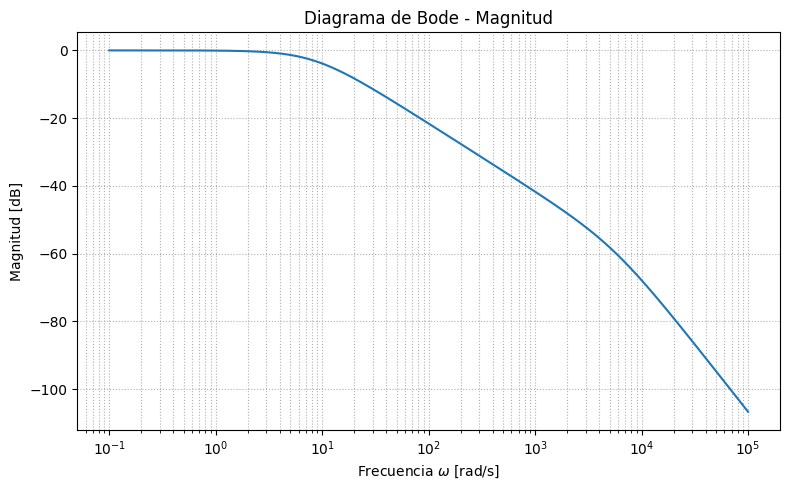

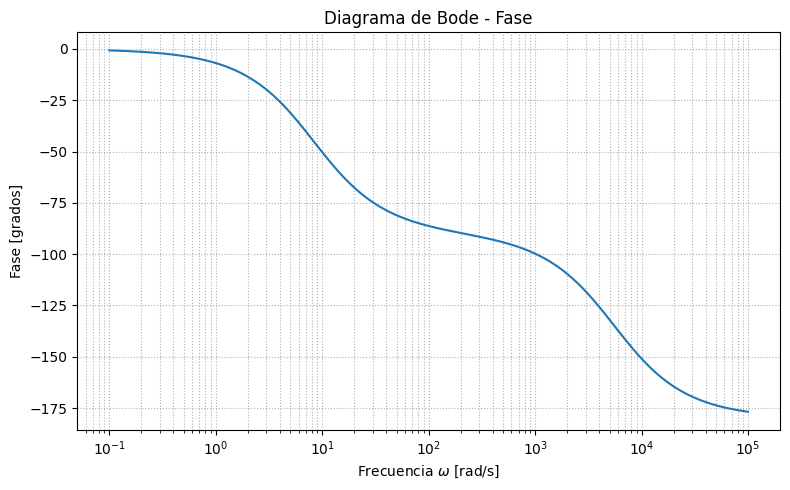

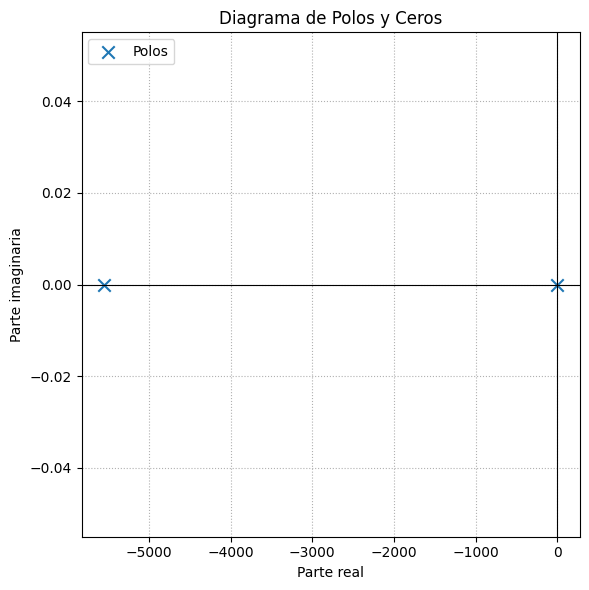

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del circuito
R = 1_000          # ohmios
L = 0.18           # henrios (180 mH)
C = 120e-6         # faradios (120 uF)

# Coeficientes del denominador: LC s^2 + RC s + 1
LC = L * C
RC = R * C

num = [1.0]                       # numerador = 1
den = [LC, RC, 1.0]               # denominador = [LC, RC, 1]

print("Numerador:", num)
print("Denominador:", den)

# Crear la función de transferencia continua
sistema = signal.TransferFunction(num, den)

# Rango de frecuencias (rad/s) para el Bode
w = np.logspace(-1, 5, 1000)      # de 10^-1 a 10^5 rad/s

# Obtener magnitud y fase
w, mag, phase = signal.bode(sistema, w=w)

# --- Diagrama de Bode: Magnitud ---
plt.figure(figsize=(8, 5))
plt.semilogarithmic = True
plt.semilogx(w, mag)
plt.title("Diagrama de Bode - Magnitud")
plt.xlabel("Frecuencia $\omega$ [rad/s]")
plt.ylabel("Magnitud [dB]")
plt.grid(True, which="both", ls=":")
plt.tight_layout()

# --- Diagrama de Bode: Fase ---
plt.figure(figsize=(8, 5))
plt.semilogx(w, phase)
plt.title("Diagrama de Bode - Fase")
plt.xlabel("Frecuencia $\omega$ [rad/s]")
plt.ylabel("Fase [grados]")
plt.grid(True, which="both", ls=":")
plt.tight_layout()

# --- Cálculo de polos y ceros ---
# Ceros: raíces del numerador
ceros = np.roots(num)
# Polos: raíces del denominador
polos = np.roots(den)

print("Ceros del sistema:", ceros)
print("Polos del sistema:", polos)

# --- Diagrama polos-ceros ---
plt.figure(figsize=(6, 6))
# Eje real e imaginario
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)

# Graficar polos (X) y ceros (O)
if len(ceros) > 0:
    plt.scatter(ceros.real, ceros.imag, marker='o', s=60, label="Ceros")
plt.scatter(polos.real, polos.imag, marker='x', s=80, label="Polos")

plt.title("Diagrama de Polos y Ceros")
plt.xlabel("Parte real")
plt.ylabel("Parte imaginaria")
plt.grid(True, ls=":")
plt.legend()
plt.tight_layout()

plt.show()
